Let's dive into the Scikit-learn implementations for **Bagging** and **Random Forests**. We'll do two examples for each – one for classification and one for regression.

---

**A. Bagging Examples (`BaggingClassifier` & `BaggingRegressor`)**

Bagging (Bootstrap Aggregating) involves training multiple instances of the same base estimator on different random subsets (bootstrap samples) of the training data and then aggregating their predictions.

**Example 1 (BaggingClassifier): Breast Cancer Dataset**

We'll use `BaggingClassifier` with `DecisionTreeClassifier` as the base estimator on the Breast Cancer dataset.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load Breast Cancer Dataset ---
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Breast Cancer Dataset Loaded for Bagging Classifier.")


Breast Cancer Dataset Loaded for Bagging Classifier.


In [3]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42, stratify=y
)
# Note: Feature scaling is not strictly necessary for tree-based estimators like DecisionTreeClassifier.


In [4]:

# --- 3. Single Decision Tree Performance (Baseline) ---
print("\n--- Single Decision Tree Classifier (Baseline) ---")
single_dt = DecisionTreeClassifier(random_state=42, max_depth=5) # A slightly constrained tree
single_dt.fit(X_train, y_train)
y_pred_single_dt = single_dt.predict(X_test)
accuracy_single_dt = accuracy_score(y_test, y_pred_single_dt)
print(f"Single Decision Tree Accuracy: {accuracy_single_dt:.4f}")



--- Single Decision Tree Classifier (Baseline) ---
Single Decision Tree Accuracy: 0.9298


In [6]:
# --- 4. Bagging Classifier ---
print("\n--- Bagging Classifier (with Decision Trees) ---")
# Base estimator
base_dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5) # Same constraint for fair comparison

# BaggingClassifier parameters:
#   base_estimator: The model to ensemble. If None, defaults to DecisionTreeClassifier().
#   n_estimators: The number of base estimators (trees) in the ensemble.
#   max_samples: The number/fraction of samples to draw from X to train each base estimator.
#   max_features: The number/fraction of features to draw from X to train each base estimator.
#   bootstrap: Whether samples are drawn with replacement (True for Bagging).
#   bootstrap_features: Whether features are drawn with replacement.
#   oob_score: Whether to use out-of-bag samples to estimate the generalization error.
#   n_jobs: The number of jobs to run in parallel for both fit and predict (-1 means using all processors).

bagging_clf = BaggingClassifier(
    estimator=base_dt_classifier,
    n_estimators=50,       # Number of trees
    max_samples=1.0,       # Use all samples for each bootstrap if 1.0 (or fraction)
    bootstrap=True,        # Enable bootstrap sampling (core of Bagging)
    oob_score=True,        # Enable OOB scoring
    random_state=42,
    n_jobs=-1
)
bagging_clf.fit(X_train, y_train)


--- Bagging Classifier (with Decision Trees) ---


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                   random_state=42),
                  n_estimators=50, n_jobs=-1, oob_score=True, random_state=42)


Bagging Classifier Accuracy: 0.9357
Bagging Classifier OOB Score: 0.9548

Confusion Matrix (Bagging):


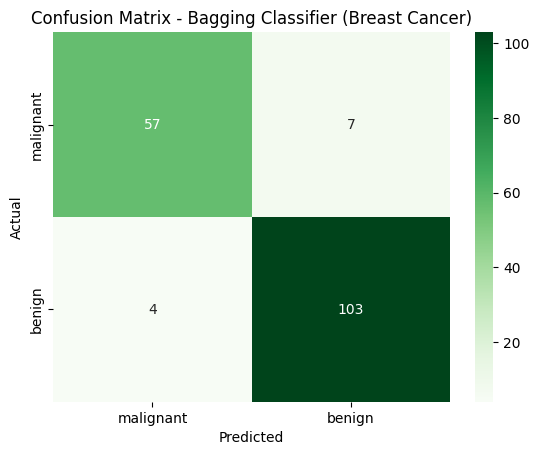


Classification Report (Bagging):
              precision    recall  f1-score   support

   malignant       0.93      0.89      0.91        64
      benign       0.94      0.96      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [7]:
# --- 5. Make Predictions and Evaluate Bagging Classifier ---
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"\nBagging Classifier Accuracy: {accuracy_bagging:.4f}")
if hasattr(bagging_clf, 'oob_score_'):
    print(f"Bagging Classifier OOB Score: {bagging_clf.oob_score_:.4f}")

print("\nConfusion Matrix (Bagging):")
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Greens", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Bagging Classifier (Breast Cancer)")
plt.show()

print("\nClassification Report (Bagging):")
print(classification_report(y_test, y_pred_bagging, target_names=target_names))


**Discussion for BaggingClassifier Example:**
* Compare the accuracy of the `BaggingClassifier` with the single `DecisionTreeClassifier`. Bagging often provides a more stable and slightly more accurate result by reducing variance.
* The `oob_score_` attribute (if `oob_score=True` during instantiation) gives an estimate of the model's performance on unseen data, calculated using the out-of-bag samples. This can be a good proxy for test set performance without needing a separate validation set during development.

---

**Example 2 (BaggingRegressor): California Housing Dataset**

Now, let's use `BaggingRegressor` with `DecisionTreeRegressor` as the base estimator for the California Housing dataset.


In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [10]:

# --- 1. Load California Housing Dataset ---
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

X_df = pd.DataFrame(X, columns=feature_names)
print("\nCalifornia Housing Dataset Loaded for Bagging Regressor.")



California Housing Dataset Loaded for Bagging Regressor.


In [11]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42
)

In [12]:
# --- 3. Single Decision Tree Regressor Performance (Baseline) ---
print("\n--- Single Decision Tree Regressor (Baseline) ---")
single_dtr = DecisionTreeRegressor(random_state=42, max_depth=10) # Constrained depth
single_dtr.fit(X_train, y_train)
y_pred_single_dtr = single_dtr.predict(X_test)
mse_single_dtr = mean_squared_error(y_test, y_pred_single_dtr)
r2_single_dtr = r2_score(y_test, y_pred_single_dtr)
print(f"Single Decision Tree Regressor - MSE: {mse_single_dtr:.4f}, R2: {r2_single_dtr:.4f}")



--- Single Decision Tree Regressor (Baseline) ---
Single Decision Tree Regressor - MSE: 0.4156, R2: 0.6834


In [14]:
# --- 4. Bagging Regressor ---
print("\n--- Bagging Regressor (with Decision Trees) ---")
base_dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=10) 

bagging_reg = BaggingRegressor(
    estimator=base_dt_regressor,
    n_estimators=50,
    max_samples=0.8, # Each tree trained on 80% of original data (bootstrap sample size)
    bootstrap=True,
    oob_score=True, # Calculate OOB score for regression (typically R2)
    random_state=42,
    n_jobs=-1
)
bagging_reg.fit(X_train, y_train)


--- Bagging Regressor (with Decision Trees) ---


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=10, random_state=42),
                 max_samples=0.8, n_estimators=50, n_jobs=-1, oob_score=True,
                 random_state=42)


Bagging Regressor - Test MSE: 0.3005, Test R2: 0.7710
Bagging Regressor OOB Score (R2): 0.7733


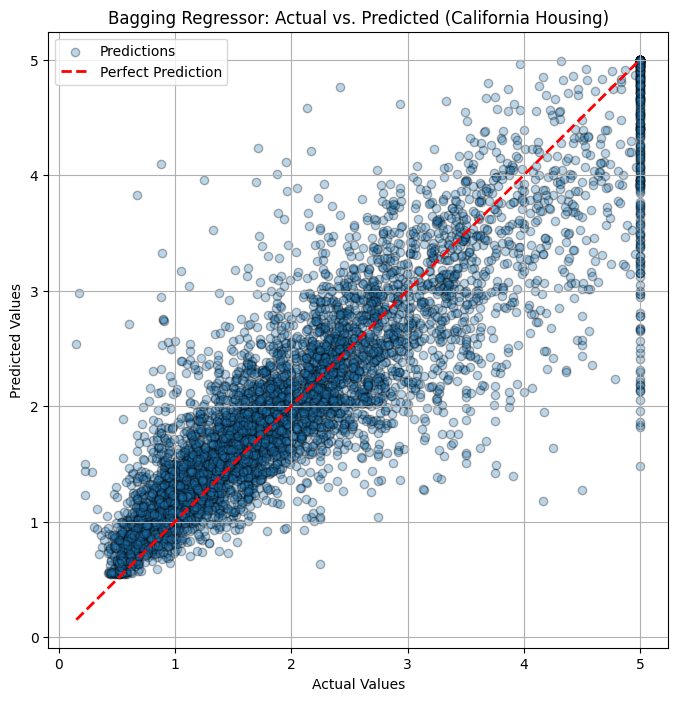

In [15]:
# --- 5. Make Predictions and Evaluate Bagging Regressor ---
y_pred_bagging_reg = bagging_reg.predict(X_test)
mse_bagging_reg = mean_squared_error(y_test, y_pred_bagging_reg)
r2_bagging_reg = r2_score(y_test, y_pred_bagging_reg)

print(f"\nBagging Regressor - Test MSE: {mse_bagging_reg:.4f}, Test R2: {r2_bagging_reg:.4f}")
if hasattr(bagging_reg, 'oob_score_') and bagging_reg.oob_score_: # Check if oob_score was computed
    print(f"Bagging Regressor OOB Score (R2): {bagging_reg.oob_score_:.4f}")

# --- Plot Actual vs. Predicted for Bagging Regressor ---
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_bagging_reg, alpha=0.3, edgecolors='k', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Bagging Regressor: Actual vs. Predicted (California Housing)")
plt.legend()
plt.grid(True)
plt.show()


**Discussion for BaggingRegressor Example:**
* Similar to the classification case, `BaggingRegressor` typically improves upon a single `DecisionTreeRegressor` by reducing variance, often leading to lower MSE and higher R2 on the test set.
* The OOB score for regression (usually $R^2$) provides an internal estimate of model performance.
* The scatter plot of actual vs. predicted values helps visualize the regressor's performance.

These two examples cover the basics of using Scikit-learn's `BaggingClassifier` and `BaggingRegressor`. Next, we'll look at Random Forests, which are a specialized and often more powerful type of bagging specifically for decision trees.
